In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt

from utils.attacks import fgsm, pgd
from utils.utils import plot_images
from utils.train_utils import eval_epoch
from models.resnet import ResNet, SparseResNet

1.7.0
True


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [3]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*stats, inplace=True)
])

ds = CIFAR10('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 20, shuffle=True)
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    break
    
X = X.clamp(0, 1)

Files already downloaded and verified


In [4]:
models = ['ResNet', 'SparseResNet', 'Robust ResNet', 'Robust SparseResNet']
clean_acc, adv_acc = [], []

# Models trained on clean images

## Model ResNet

In [5]:
model = ResNet().to(device)
model.load_state_dict(torch.load("saved/resnet.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

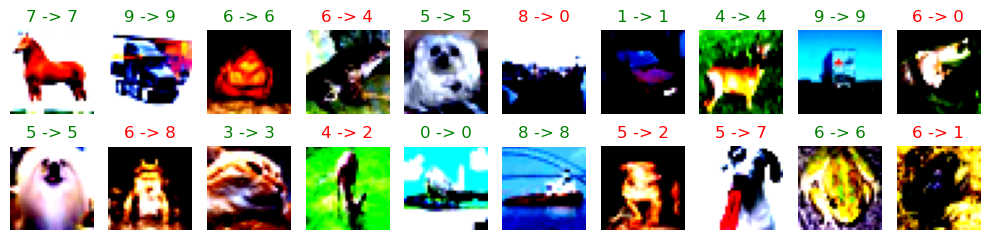

In [6]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

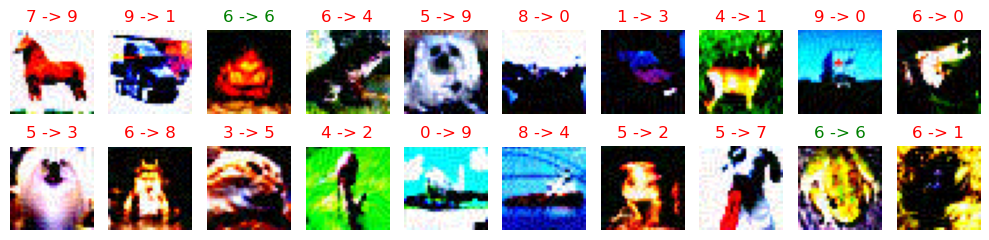

In [7]:
noise = pgd(model, X, y, nn.CrossEntropyLoss())
adv_ex = (X+noise).clamp(0, 1)
plot_images(adv_ex, y, model(adv_ex), 2, 10)

In [8]:
clean_correct, adv_correct = 0, 0
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    noise = pgd(model, X, y, nn.CrossEntropyLoss())
    adv_ex = (X+noise).clamp(0,1)
    
    clean_correct += (model(X).max(dim=1)[1] == y).sum().item()
    adv_correct += (model(adv_ex).max(dim=1)[1] == y).sum().item()

acc_clean = round(clean_correct / len(test_loader.dataset), 4)
acc_adver = round(adv_correct / len(test_loader.dataset), 4)
print(f"clean accuracy: {acc_clean}, adv_acc: {acc_adver}")

clean_acc.append(acc_clean)
adv_acc.append(acc_adver)

clean accuracy: 0.8718, adv_acc: 0.299


# Model SparseResNet

In [9]:
model = SparseResNet().to(device)
model.load_state_dict(torch.load("saved/sparse_resnet.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

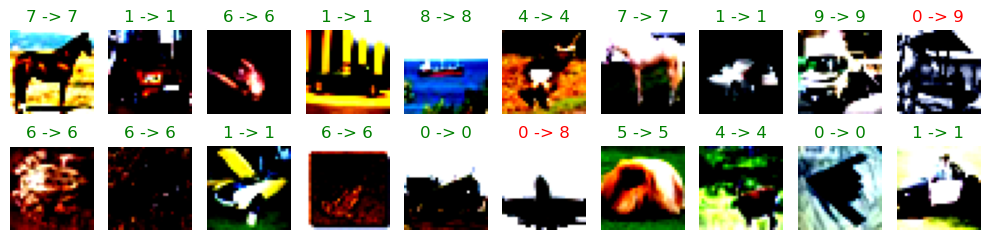

In [10]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

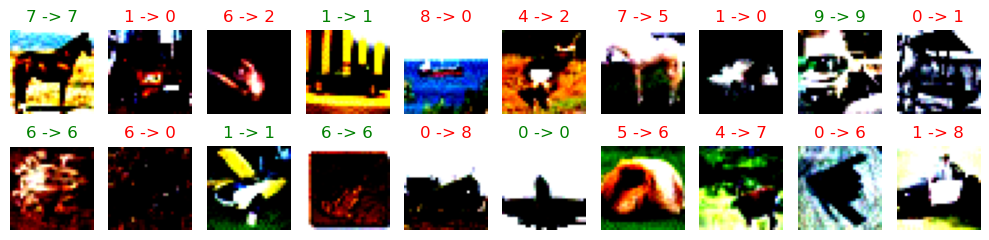

In [11]:
noise = pgd(model, X, y, nn.CrossEntropyLoss())
adv_ex = (X+noise).clamp(0, 1)
plot_images(adv_ex, y, model(adv_ex), 2, 10)

In [12]:
clean_correct, adv_correct = 0, 0
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    noise = pgd(model, X, y, nn.CrossEntropyLoss())
    adv_ex = (X+noise).clamp(0,1)
    
    clean_correct += (model(X).max(dim=1)[1] == y).sum().item()
    adv_correct += (model(adv_ex).max(dim=1)[1] == y).sum().item()

acc_clean = round(clean_correct / len(test_loader.dataset), 4)
acc_adver = round(adv_correct / len(test_loader.dataset), 4)
print(f"clean accuracy: {acc_clean}, adv_acc: {acc_adver}")

clean_acc.append(acc_clean)
adv_acc.append(acc_adver)

clean accuracy: 0.8727, adv_acc: 0.2921


# Adversarial Training

## Robust ResNet

In [13]:
# model = ResNet().to(device)
# model.load_state_dict(torch.load("saved/resnet_robust.pt", map_location=device))

**Predictions on clean pictures**

In [14]:
# plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

In [15]:
# noise = pgd(model, X, y, nn.CrossEntropyLoss())
# adv_ex = (X+noise).clamp(0, 1)
# y_pred = model(adv_ex)
# plot_images(adv_ex, y, y_pred, 2, 10)

In [16]:
# clean_correct, adv_correct = 0, 0
# for X, y in test_loader:
#     X, y = X.to(device), y.to(device)
#     noise = pgd(model, X, y, nn.CrossEntropyLoss())
#     adv_ex = (X+noise).clamp(0,1)
    
#     clean_correct += (model(X).max(dim=1)[1] == y).sum().item()
#     adv_correct += (model(adv_ex).max(dim=1)[1] == y).sum().item()

# acc_clean = round(clean_correct / len(test_loader.dataset), 4)
# acc_adver = round(adv_correct / len(test_loader.dataset), 4)
# print(f"clean accuracy: {acc_clean}, adv_acc: {acc_adver}")

# clean_acc.append(acc_clean)
# adv_acc.append(acc_adver)

## Robust SparseResNet

In [17]:
model = SparseResNet().to(device)
model.load_state_dict(torch.load("saved/sparse_resnet_robust.pt", map_location=device))

<All keys matched successfully>

**Predictions on clean pictures**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

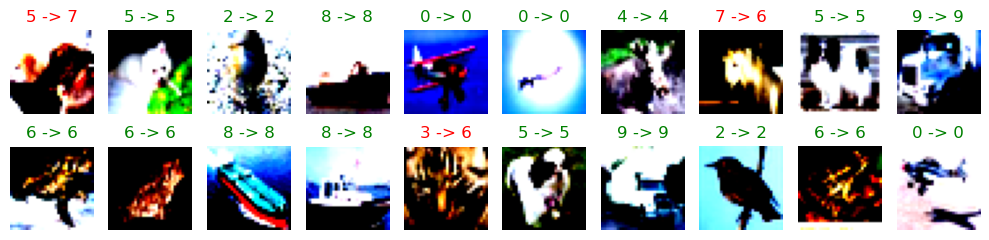

In [18]:
plot_images(X, y, model(X), 2, 10)

**Predictions on attacked images with PGD method**

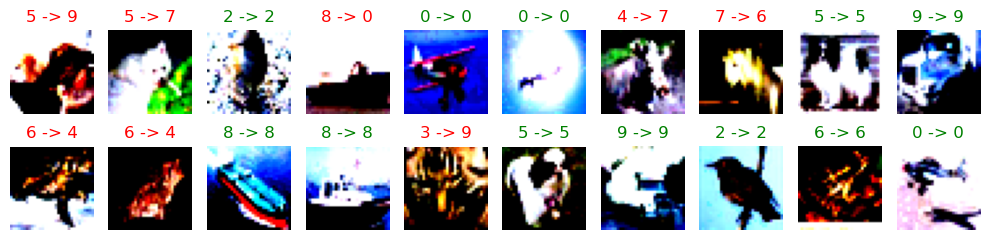

In [19]:
noise = pgd(model, X, y, nn.CrossEntropyLoss())
adv_ex = (X+noise).clamp(0, 1)
y_pred = model(adv_ex)
plot_images(adv_ex, y, y_pred, 2, 10)

In [20]:
clean_correct, adv_correct = 0, 0
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    noise = pgd(model, X, y, nn.CrossEntropyLoss())
    adv_ex = (X+noise).clamp(0,1)
    
    clean_correct += (model(X).max(dim=1)[1] == y).sum().item()
    adv_correct += (model(adv_ex).max(dim=1)[1] == y).sum().item()

acc_clean = round(clean_correct / len(test_loader.dataset), 4)
acc_adver = round(adv_correct / len(test_loader.dataset), 4)
print(f"clean accuracy: {acc_clean}, adv_acc: {acc_adver}")

clean_acc.append(acc_clean)
adv_acc.append(acc_adver)

clean accuracy: 0.7949, adv_acc: 0.5288


In [21]:
models = ['ResNet', 'SparseResNet', 'Robust SparseResNet']

import pandas as pd
d = {
    'model': models, 
    'clean image accuracy': clean_acc, 
    'adv image accuracy': adv_acc,
}
df = pd.DataFrame(data=d)
df

,model,clean image accuracy,adv image accuracy
0,ResNet,0.8718,0.2990
1,SparseResNet,0.8727,0.2921
2,Robust SparseResNet,0.7949,0.5288
